In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

c:\Users\pujas\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


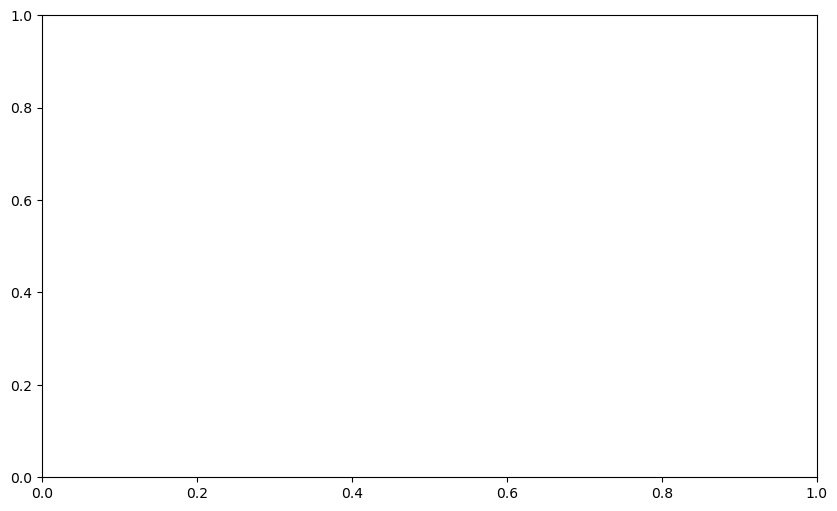

In [3]:
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and axis for plotting

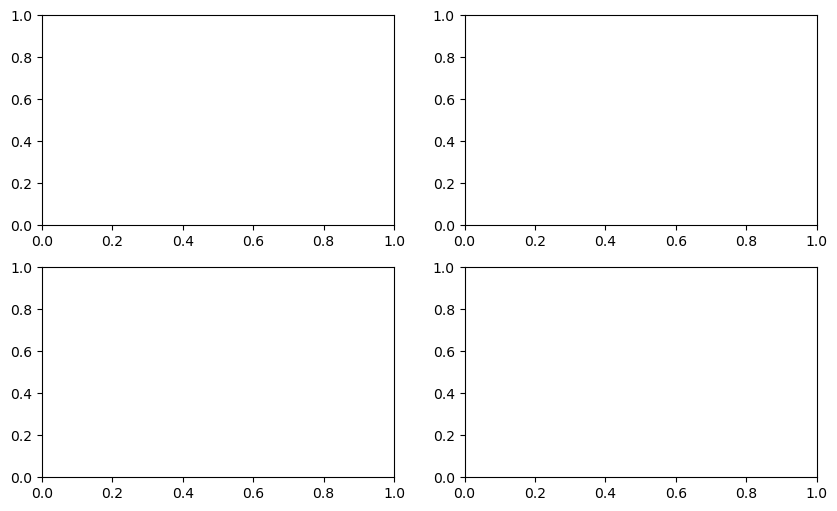

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

<Axes: xlabel='job_title_short'>

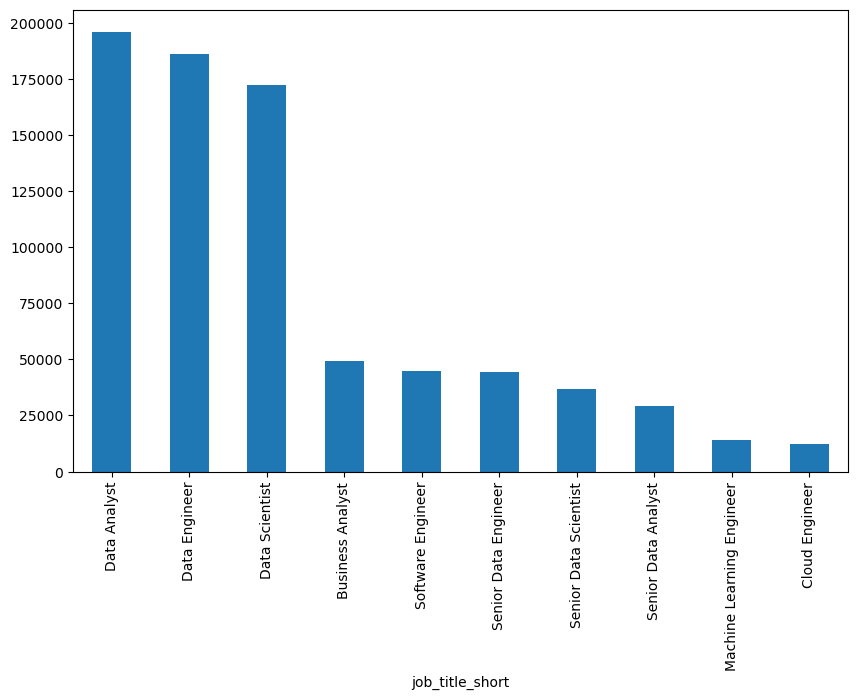

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

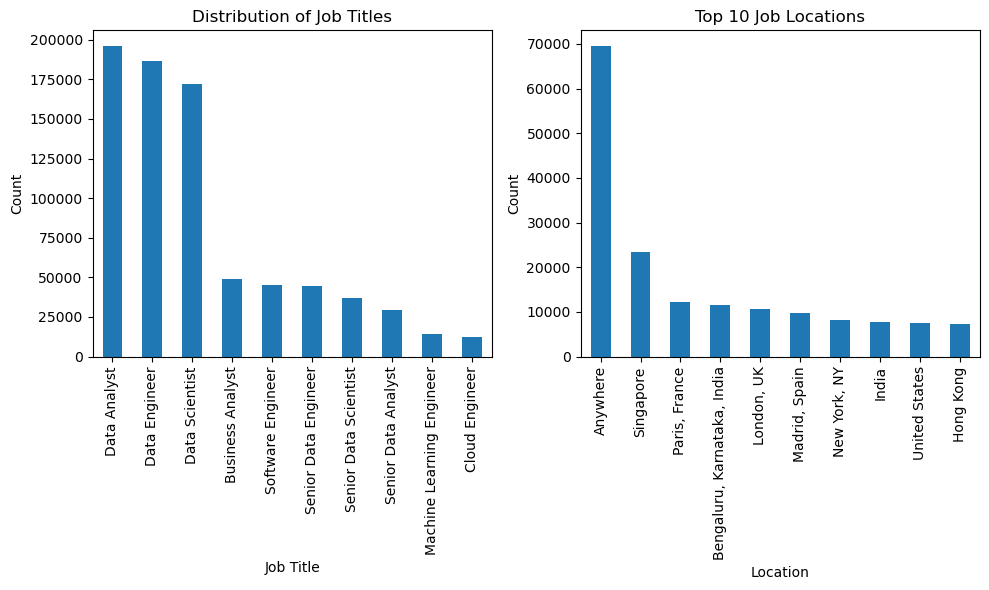

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6)) #plot using pandas with subplots, 1 row and 2 columns

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0]) # ax[0] refers to the first subplot for job titles
ax[0].set_title('Distribution of Job Titles')  
ax[0].set_xlabel('Job Title')
ax[0].set_ylabel('Count')


df['job_location'].value_counts().head(10).plot(kind='bar', ax=ax[1]) # Plot the top 10 job locations on the second subplot
ax[1].set_title('Top 10 Job Locations')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Count')

fig.tight_layout() # Adjust layout to prevent overlap
plt.show()


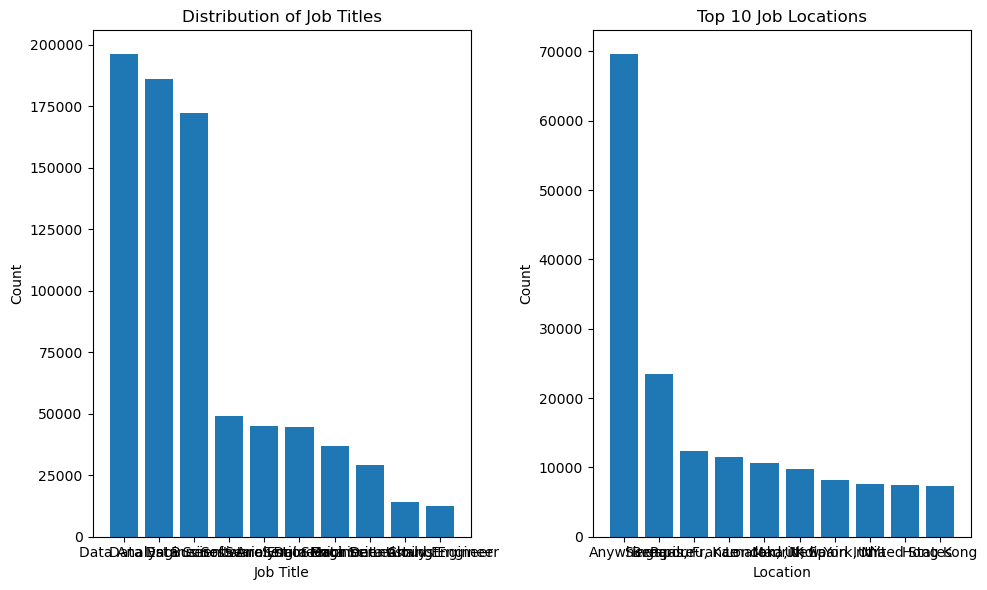

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6)) #plot using matplotlib with subplots, 1 row and 2 columns

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts().values) # Plot job titles on the first subplot
ax[0].set_title('Distribution of Job Titles')
ax[0].set_xlabel('Job Title')
ax[0].set_ylabel('Count')

ax[1].bar(df['job_location'].value_counts().head(10).index, df['job_location'].value_counts().head(10).values) # Plot the top 10 job locations on the second subplot
ax[1].set_title('Top 10 Job Locations')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Count')
fig.tight_layout() # Adjust layout to prevent overlap
plt.show()


#Use pandas one to plot the distribution of job titles and locations with subplots, 1 row and 2 columns, which is used in cell before this cell


In [8]:
df_skills = df.copy() # Create a copy of the original DataFrame to work with skills data
df_skills = df_skills.explode('job_skills') # Explode the job_skills column to have one skill per rowskill
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count') # Reset index to turn the groupby result into a DataFrame
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count.head(10)

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
558,excel,Data Analyst,66860
141,aws,Data Engineer,62049
151,azure,Data Engineer,60674
1518,r,Data Scientist,59566
1478,python,Data Analyst,57190


In [9]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

0 Data Analyst
1 Data Scientist
2 Data Engineer


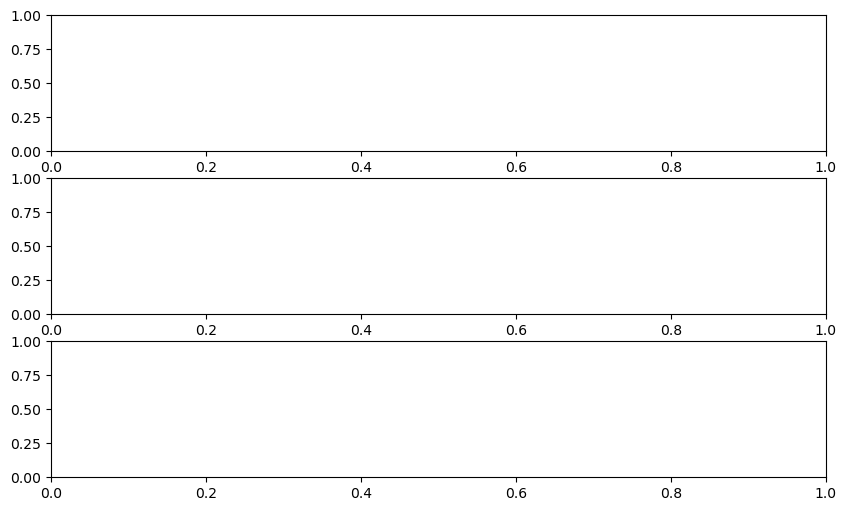

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6)) # Create a figure and axis for plotting

for i, job_title in enumerate(job_titles):
    print(i, job_title)

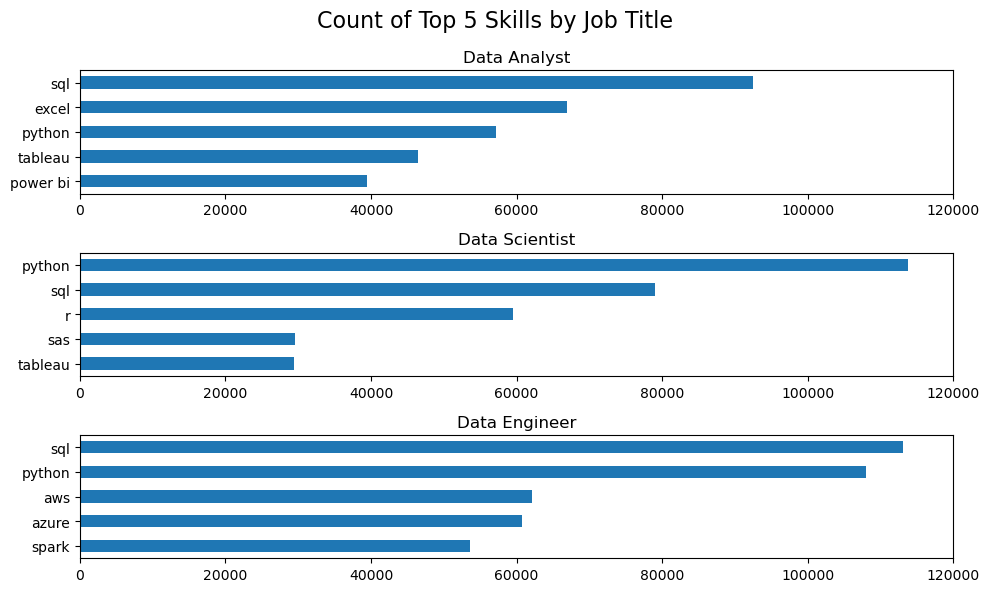

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6)) # Create a figure and axis for plotting

for i, job_title in enumerate(job_titles):
    df_filtered_skills = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) #Filter the skills count DataFrame for the current job title and take the top 5 skills
    df_filtered_skills.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False, title=job_title) # Plot the top 5 skills for the current job title on the corresponding subplot

    ax[i].invert_yaxis() # Invert the y-axis to have the highest skill count at the top

    ax[i].set_ylabel('') # Remove y-axis label for better aesthetics
    ax[i].set_xlim(0, 120000) # Set x-axis limit for better visualization

fig.suptitle('Count of Top 5 Skills by Job Title', fontsize=16) # Add a super title for the entire figure
fig.tight_layout() # Adjust layout to prevent overlap
plt.show()